In [207]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

In [428]:
df = pd.read_csv("C:\\Users\\lenovo\\OneDrive\\data science\\DS project\\sentimental analysis\\financial_sentiment_data.csv")
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5837,RISING costs have forced packaging producer Hu...,negative
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral
5840,"In the building and home improvement trade , s...",neutral


In [429]:
df[df.duplicated()]

,Sentence,Sentiment
1825,Proha Plc ( Euronext :7327 ) announced today (...,neutral
1859,SSH Communications Security Corporation is hea...,neutral
2672,Ahlstrom 's share is quoted on the NASDAQ OMX ...,neutral
3272,The company serves customers in various indust...,neutral
3986,The issuer is solely responsible for the conte...,neutral
5342,The report profiles 614 companies including ma...,neutral


In [430]:
df = df.drop_duplicates()

In [431]:
Duplicate = df[df.duplicated(subset=['Sentence'])]
Duplicate

,Sentence,Sentiment
266,Finnish GeoSentric 's net sales decreased to E...,neutral
283,Sales in Finland decreased by 10.5 % in Januar...,negative
349,Full-year operating result for 2008 was 3.6 mi...,negative
387,"Making matters more difficult , the company sa...",negative
496,"Antti Orkola , president of Kemira GrowHow 's ...",negative
...,...,...
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative
5831,Finnish developer and manufacturer of mobile p...,negative
5832,Operating profit fell to EUR 38.1 mn from EUR ...,negative
5837,RISING costs have forced packaging producer Hu...,negative


In [432]:
print(df["Sentence"][5821])

Finnish electronics contract manufacturer Scanfil reports net sales of EUR 241.2 mn in 2006 , down from EUR 321.6 mn in 2005 .


In [433]:
df[df['Sentence'] == "( ADPnews ) - Oct 21 , 2009 - Finland-based IT consultancy Tieto Oyj ( HEL : TIE1V ) said today its net profit plunged to EUR 29.4 million ( USD 43.9 m ) for the first nine months of 2009 from EUR 58.7 million for the same period o"]

,Sentence,Sentiment
1186,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",neutral
5827,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative


In [434]:
df = df.drop_duplicates(subset=['Sentence'], keep=False)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
5835,HSBC Says Unit to Book $585 Million Charge on ...,negative
5836,Daily Mail parent company in talks with potent...,positive
5838,Nordic Walking was first used as a summer trai...,neutral
5839,"According shipping company Viking Line , the E...",neutral


In [435]:
df = df.reset_index()
df = df.drop('index', axis=1)
df

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
...,...,...
4803,HSBC Says Unit to Book $585 Million Charge on ...,negative
4804,Daily Mail parent company in talks with potent...,positive
4805,Nordic Walking was first used as a summer trai...,neutral
4806,"According shipping company Viking Line , the E...",neutral


# Preprocessing

In [436]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [437]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [438]:
def preprocess(text):
    # remove HTML tags and URLs
    text = re.sub(r'http\S+', '', text)
    text = BeautifulSoup(text, "html.parser").get_text()
    # remove non-alphabetical characters and digits
    text = re.sub('[^a-zA-Z\s]', '', text)
    # convert to lowercase
    text = text.lower()
    # tokenize the text
    tokens = word_tokenize(text)
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    # join the tokens back into a string
    text = ' '.join(lemmatized_tokens)
    return text

In [439]:
df['Sentence'] = df['Sentence'].apply(preprocess)
df

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubled eurm ...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral
...,...,...
4803,hsbc say unit book million charge settlement,negative
4804,daily mail parent company talk potential partn...,positive
4805,nordic walking first used summer training meth...,neutral
4806,according shipping company viking line eu deci...,neutral


In [440]:
df.to_csv('Preprocessed', index=False)

In [441]:
def get_nonstopword_frequencies(dataset_file_path):

    # Create three separate DataFrames for each class
    positive_df = df[df['Sentiment'] == 'positive']
    negative_df = df[df['Sentiment'] == 'negative']
    neutral_df = df[df['Sentiment'] == 'neutral']

    # Tokenize the text column and create a set of unique words for each class
    positive_words = set(nltk.tokenize.word_tokenize(' '.join(positive_df['Sentence'].tolist())))
    negative_words = set(nltk.tokenize.word_tokenize(' '.join(negative_df['Sentence'].tolist())))
    neutral_words = set(nltk.tokenize.word_tokenize(' '.join(neutral_df['Sentence'].tolist())))

    # Combine the sets of words into a single set
    all_words = positive_words.union(negative_words).union(neutral_words)

    # Create a list of stop words from NLTK
    stop_words = set(nltk.corpus.stopwords.words('english'))

    # Remove stop words from the set of all words
    non_stop_words = all_words.difference(stop_words)

    # Calculate the frequency of each non-stop word in each class
    positive_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(positive_df['Sentence'].tolist())) if word in non_stop_words])
    negative_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(negative_df['Sentence'].tolist())) if word in non_stop_words])
    neutral_freqdist = nltk.FreqDist([word for word in nltk.tokenize.word_tokenize(' '.join(neutral_df['Sentence'].tolist())) if word in non_stop_words])

    # Create a pandas DataFrame for non-stop words
    df_nonstopwords = pd.DataFrame(columns=['Word', 'Positive_Frequency', 'Negative_Frequency', 'Neutral_Frequency', 'Average_Frequency', 'Total_Frequency'])

    # Loop over all non-stop words and add their frequencies to the DataFrame
    for word in non_stop_words:
        freqs = [positive_freqdist[word], negative_freqdist[word], neutral_freqdist[word]]
        total_freq = sum(freqs)
        avg_freq = sum(freqs) / len(freqs)
        df_nonstopwords = df_nonstopwords.append({'Word': word, 
                                                  'Positive_Frequency': positive_freqdist[word], 
                                                  'Negative_Frequency': negative_freqdist[word], 
                                                  'Neutral_Frequency': neutral_freqdist[word],
                                                  'Average_Frequency': avg_freq,
                                                  'Total_Frequency': total_freq}, 
                                                 ignore_index=True)

    # Sort the DataFrame by the Average_Frequency column in descending order
    df_nonstopwords = df_nonstopwords.sort_values(by='Total_Frequency', ascending=False)

    # Return the sorted DataFrame
    return df_nonstopwords

In [442]:
df_freq_words = get_nonstopword_frequencies('df')

In [443]:
df_freq_words.head(25)

,Word,Positive_Frequency,Negative_Frequency,Neutral_Frequency,Average_Frequency,Total_Frequency
2307,eur,582,0,293,291.666667,875
783,company,232,5,509,248.666667,746
7282,sale,229,17,177,141.000000,423
8547,share,113,28,281,140.666667,422
2651,said,194,0,194,129.333333,388
6617,mn,257,0,92,116.333333,349
7199,finnish,177,0,172,116.333333,349
5234,million,164,5,177,115.333333,346
5999,net,197,1,103,100.333333,301
5836,service,88,1,193,94.000000,282


In [444]:
most_freq_words=df_freq_words[(df_freq_words['Total_Frequency']>200)]

In [445]:
most_freq_words = set(most_freq_words['Word'].tolist())

In [446]:
most_freq_words

{'business',
 'company',
 'eur',
 'finland',
 'finnish',
 'group',
 'market',
 'million',
 'mln',
 'mn',
 'net',
 'new',
 'profit',
 'said',
 'sale',
 'service',
 'share',
 'year'}

In [447]:
def remove_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in most_freq_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

In [448]:
df['Sentence'] = df['Sentence'].apply(remove_words)
df

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low bk real possibility,negative
2,last quarter componenta doubled eurm eurm peri...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral
...,...,...
4803,hsbc say unit book charge settlement,negative
4804,daily mail parent talk potential partner joint...,positive
4805,nordic walking first used summer training meth...,neutral
4806,according shipping viking line eu decision sig...,neutral


df.info()

# TF-IDF

In [450]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf = TfidfVectorizer()

In [451]:
X=tfidf.fit_transform(df['Sentence'])

In [452]:
empty_rows = (X.sum(axis=1) == 0).nonzero()[0]
empty_rows

array([ 768, 1458], dtype=int64)

In [453]:
print(df.iloc[empty_rows])

     Sentence Sentiment
768             neutral
1458            neutral


In [454]:
df.drop(empty_rows, inplace=True)

In [455]:
X=tfidf.fit_transform(df['Sentence'])

In [456]:
empty_rows = (X.sum(axis=1) == 0).nonzero()[0]
empty_rows

array([], dtype=int64)

In [457]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(df["Sentiment"])
from collections import Counter
Counter(y)

Counter({2: 1852, 0: 346, 1: 2608})

In [458]:
class_labels = list(le.classes_)
class_labels_numerical = list(le.transform(class_labels))

In [459]:
print("Class labels:", class_labels)
print("Numerical labels:", class_labels_numerical)

Class labels: ['negative', 'neutral', 'positive']
Numerical labels: [0, 1, 2]


# SMOTEENN- combination of up and down sampling

In [460]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(sampling_strategy={0: 2606, 1: 2900, 2: 2800},random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [461]:
Counter(y_resampled)

Counter({0: 2603, 1: 857, 2: 1683})

# train_test_split

In [462]:
from sklearn.model_selection import train_test_split

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)

# Support Vector Machine

In [464]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

In [465]:
SupportVector = SVC()

In [466]:
SupportVector.fit(X_train, y_train)

SVC()

In [467]:
y_pred_SV = SupportVector.predict(X_test)
print(classification_report(y_test, y_pred_SV))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
           1       0.98      0.96      0.97       147
           2       0.98      0.99      0.98       344

    accuracy                           0.99      1029
   macro avg       0.98      0.98      0.98      1029
weighted avg       0.99      0.99      0.99      1029



In [468]:
confusion_matrix(y_test, y_pred_SV)

array([[536,   0,   2],
       [  0, 141,   6],
       [  2,   3, 339]], dtype=int64)

In [469]:
y_train_pred_SV = SupportVector.predict(X_train)
print(classification_report(y_train, y_train_pred_SV))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2065
           1       1.00      1.00      1.00       710
           2       1.00      1.00      1.00      1339

    accuracy                           1.00      4114
   macro avg       1.00      1.00      1.00      4114
weighted avg       1.00      1.00      1.00      4114



In [470]:
from sklearn.model_selection import cross_val_score

In [471]:
scores_SV = cross_val_score(SupportVector, X_train, y_train, cv=5)
scores_SV

array([0.98298906, 0.97934386, 0.98298906, 0.97691373, 0.98175182])

In [250]:
print(f"Mean CV score: {np.mean(scores_SV)}")
print(f"Standard deviation: {np.std(scores_SV)}")

Mean CV score: 0.9807975095564562
Standard deviation: 0.0023542884355375417


In [251]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [497]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    # Plot the training and validation scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

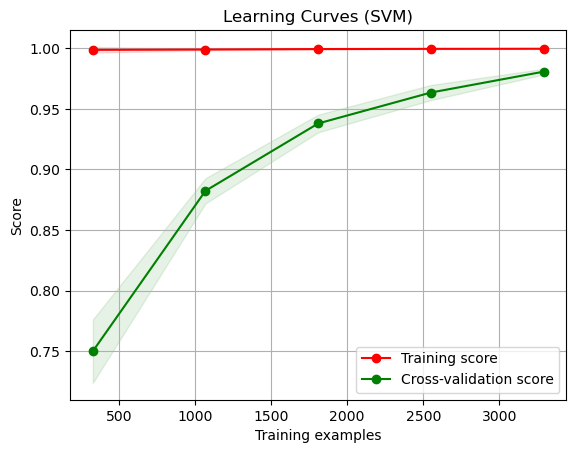

In [119]:
title = "Learning Curves (SVM)"
plot_learning_curve(SupportVector, title, X_train, y_train, cv=5)
plt.show()

# Random Forest 

In [472]:
from sklearn.ensemble import RandomForestClassifier

In [473]:
RandomForest = RandomForestClassifier()

In [474]:
RandomForest.fit(X_train, y_train)

RandomForestClassifier()

In [475]:
y_pred_RF = RandomForest.predict(X_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       538
           1       0.94      0.88      0.91       147
           2       0.93      0.94      0.94       344

    accuracy                           0.96      1029
   macro avg       0.95      0.94      0.94      1029
weighted avg       0.96      0.96      0.96      1029



In [476]:
confusion_matrix(y_test, y_pred_RF)

array([[530,   0,   8],
       [  1, 130,  16],
       [ 10,   9, 325]], dtype=int64)

In [477]:
y_train_pred_RF = RandomForest.predict(X_train)
print(classification_report(y_train, y_train_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2065
           1       1.00      1.00      1.00       710
           2       1.00      1.00      1.00      1339

    accuracy                           1.00      4114
   macro avg       1.00      1.00      1.00      4114
weighted avg       1.00      1.00      1.00      4114



In [258]:
scores_RF = cross_val_score(RandomForest, X_train, y_train, cv=5)
scores_RF

array([0.94896719, 0.93924666, 0.93438639, 0.95382746, 0.94038929])

In [127]:
print(f"Mean CV score: {np.mean(scores_RF)}")
print(f"Standard deviation: {np.std(scores_RF)}")

Mean CV score: 0.944822366690022
Standard deviation: 0.005934445566945273


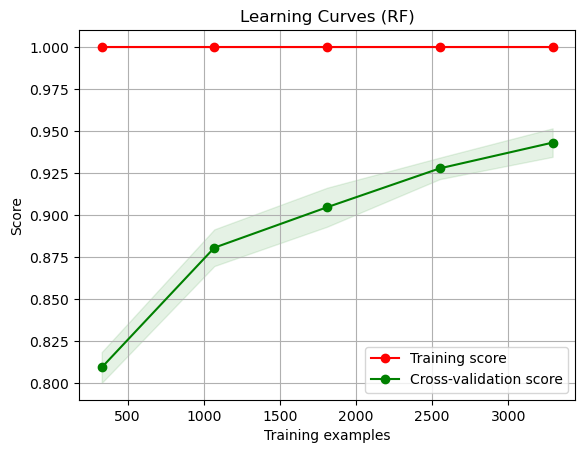

In [128]:
title3 = "Learning Curves (RF)"
plot_learning_curve(RandomForest, title3, X_train, y_train, cv=5)
plt.show()

# Naive Bayes 'MultinomialNB' 

In [478]:
from sklearn.naive_bayes import MultinomialNB

In [479]:
Multinomial =  MultinomialNB()

In [480]:
Multinomial.fit(X_train, y_train)

MultinomialNB()

In [481]:
y_pred_M = Multinomial.predict(X_test)
print(classification_report(y_test, y_pred_M))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       538
           1       1.00      0.77      0.87       147
           2       0.91      0.84      0.87       344

    accuracy                           0.91      1029
   macro avg       0.94      0.87      0.90      1029
weighted avg       0.92      0.91      0.91      1029



In [482]:
confusion_matrix(y_test, y_pred_M)

array([[538,   0,   0],
       [  6, 113,  28],
       [ 56,   0, 288]], dtype=int64)

In [483]:
y_train_pred_M = Multinomial.predict(X_train)
print(classification_report(y_train, y_train_pred_M))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2065
           1       1.00      0.87      0.93       710
           2       0.94      0.91      0.93      1339

    accuracy                           0.95      4114
   macro avg       0.96      0.93      0.94      4114
weighted avg       0.95      0.95      0.95      4114



In [265]:
scores_M = cross_val_score(Multinomial, X_train, y_train, cv=5)
scores_M

array([0.89307412, 0.90400972, 0.90157959, 0.88942892, 0.89537713])

In [266]:
print(f"Mean CV score: {np.mean(scores_M)}")
print(f"Standard deviation: {np.std(scores_M)}")

Mean CV score: 0.89669389480655
Standard deviation: 0.005385310040463709


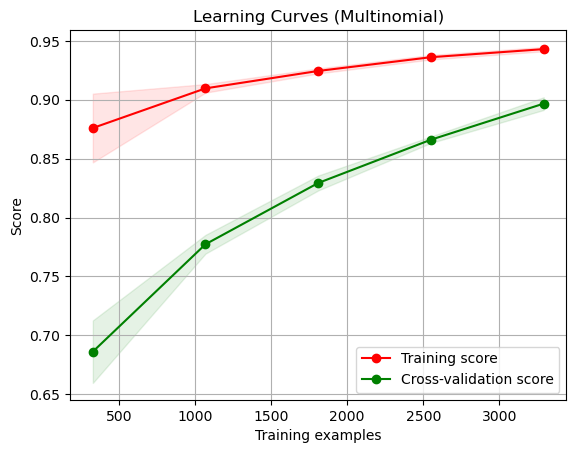

In [267]:
title2 = "Learning Curves (Multinomial)"
plot_learning_curve(Multinomial, title2, X_train, y_train, cv=5)
plt.show()

# Logistic Regression

In [484]:
from sklearn.linear_model import LogisticRegression

In [485]:
LogisticRegression = LogisticRegression()

In [486]:
LogisticRegression.fit(X_train, y_train)

LogisticRegression()

In [487]:
y_pred_LR = LogisticRegression.predict(X_test)
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       538
           1       0.97      0.91      0.94       147
           2       0.96      0.94      0.95       344

    accuracy                           0.97      1029
   macro avg       0.97      0.95      0.96      1029
weighted avg       0.97      0.97      0.97      1029



In [488]:
confusion_matrix(y_test, y_pred_LR)

array([[538,   0,   0],
       [  0, 134,  13],
       [ 18,   4, 322]], dtype=int64)

In [489]:
y_train_pred_LR = LogisticRegression.predict(X_train)
print(classification_report(y_train, y_train_pred_LR))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2065
           1       0.99      0.97      0.98       710
           2       0.98      0.98      0.98      1339

    accuracy                           0.99      4114
   macro avg       0.99      0.98      0.99      4114
weighted avg       0.99      0.99      0.99      4114



In [490]:
scores_LR = cross_val_score(LogisticRegression, X_train, y_train, cv=5)
scores_LR

array([0.95868773, 0.94896719, 0.95504253, 0.94775213, 0.95255474])

In [491]:
print(f"Mean CV score: {np.mean(scores_LR)}")
print(f"Standard deviation: {np.std(scores_LR)}")

Mean CV score: 0.9526008638504315
Standard deviation: 0.003993183648171913


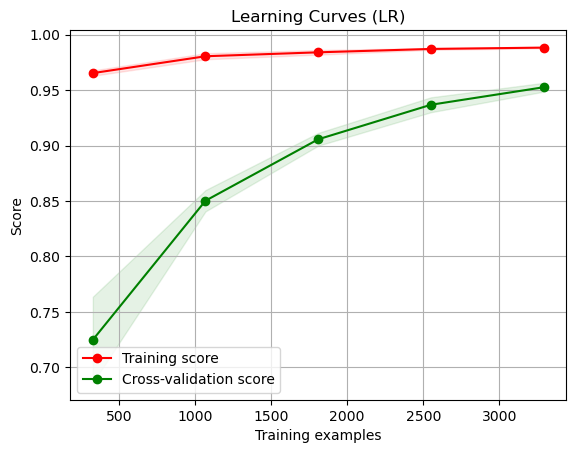

In [276]:
title4 = "Learning Curves (LR)"
plot_learning_curve(LogisticRegression, title4, X_train, y_train, cv=5)
plt.show()

# XGboost

In [493]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=200)
xgb_clf.fit(X_train, y_train)
y_pred_xg=xgb_clf.predict(X_test)
print('Train accuracy:{}'.format(xgb_clf.score(X_train,y_train)))
print('Test accuracy:{}'.format(xgb_clf.score(X_test,y_test)))

print(metrics.classification_report(y_test,y_pred_xg))

Train accuracy:0.9992707826932425
Test accuracy:0.9484936831875608
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       538
           1       0.88      0.91      0.90       147
           2       0.94      0.91      0.92       344

    accuracy                           0.95      1029
   macro avg       0.93      0.93      0.93      1029
weighted avg       0.95      0.95      0.95      1029



In [494]:
confusion_matrix(y_test, y_pred_xg)

array([[530,   1,   7],
       [  1, 134,  12],
       [ 15,  17, 312]], dtype=int64)

In [495]:
scores_xg = cross_val_score(xgb_clf, X_train, y_train, cv=5)
scores_xg

array([0.93681652, 0.94410693, 0.93560146, 0.94410693, 0.94525547])

In [496]:
print(f"Mean CV score: {np.mean(scores_xg)}")
print(f"Standard deviation: {np.std(scores_xg)}")

Mean CV score: 0.9411774618406932
Standard deviation: 0.004096420262837837


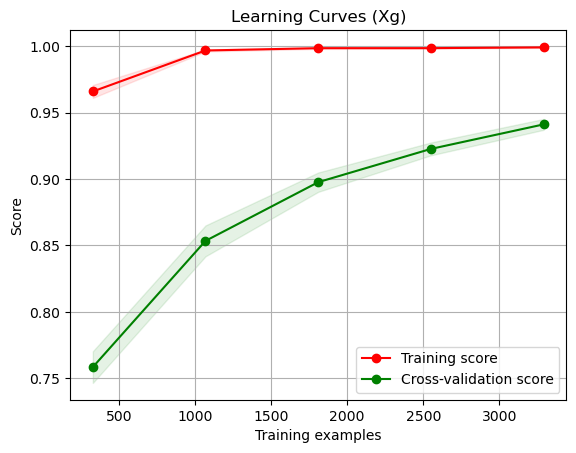

In [498]:
title5 = "Learning Curves (Xg)"
plot_learning_curve(xgb_clf, title5, X_train, y_train, cv=5)
plt.show()

In [279]:
def predict_sentiment(text):
    if text is None:
        return ''
    text = re.sub('<[^<]+?>', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub('[^A-Za-z]', ' ', text.lower())
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    words = [word for word in words if word is not None]
    text = ' '.join(words)
    text_tfidf = tfidf.transform([text])
    prediction = LogisticRegression.predict(text_tfidf)
    
    # Convert the predicted label to the corresponding sentiment class
    if prediction == 0:
        return "negative"
    elif prediction == 1:
        return "neutral"
    elif prediction == 2:
        return "positive"
    else:
        return ""

In [280]:
predict_sentiment('his company was very bad in the starting, but now he has improved so much in all aspects')

'positive'

In [281]:
predict_sentiment("company is bad")

'negative'

In [285]:
predict_sentiment("company is not performing that well")

'positive'

# Results of Model using Tf-idf

In [500]:
res1={'Models':['logistic regression','SVM','Naive bayes','Random forest','Xgboost'],
    'Training Acc':[LogisticRegression.score(X_train,y_train),SupportVector.score(X_train,y_train),Multinomial.score(X_train,y_train),
                    RandomForest.score(X_train,y_train),xgb_clf.score(X_train,y_train)],
    'Testing Acc':[LogisticRegression.score(X_test,y_test),SupportVector.score(X_test,y_test),Multinomial.score(X_test,y_test),
                    RandomForest.score(X_test,y_test),xgb_clf.score(X_test,y_test)]}

In [501]:
res1=pd.DataFrame(res1)
res1

,Models,Training Acc,Testing Acc
0,logistic regression,0.988576,0.965986
1,SVM,0.999757,0.987366
2,Naive bayes,0.949198,0.912536
3,Random forest,1.000000,0.957240
4,Xgboost,0.999271,0.948494


### conclusions:
- SVM outperformed the other models on both the train and test sets, achieving an accuracy of 99.98% on the train set and 98.74% on the test set.
- Logistic regression also performed well, achieving an accuracy of 98.86% on the train set and 96.60% on the test set.
- Naive Bayes had the lowest performance of the models evaluated, achieving an accuracy of 94.92% on the train set and 91.25% on the test set.
- Random forest and XGBoost both achieved perfect accuracy on the train set, but their test set performances were not as high as the other models.

# Word2vec model trained on a given corpus

In [337]:
import gensim

In [427]:
df=pd.read_csv("C:\\Users\\lenovo\\ds project\\Sentimental analysis\\Preprocessed")
df.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubled eurm ...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral


In [338]:
tokenize=df['Sentence'].apply(lambda x: x.split())
w2vec_model=gensim.models.Word2Vec(tokenize,min_count = 1, vector_size= 300, window = 20, sg = 1)
w2vec_model.train(tokenize,total_examples= len(df['Sentence']),epochs=20)

(994191, 1060640)

In [502]:
w2v_words = list(w2vec_model.wv.key_to_index)
print("sample words ", w2v_words[0:50])

sample words  ['eur', 'company', 'sale', 'share', 'said', 'finnish', 'mn', 'million', 'net', 'service', 'profit', 'group', 'market', 'new', 'finland', 'business', 'year', 'mln', 'operating', 'also', 'euro', 'period', 'quarter', 'oyj', 'product', 'price', 'today', 'contract', 'operation', 'solution', 'first', 'stock', 'order', 'plant', 'total', 'bank', 'percent', 'customer', 'unit', 'financial', 'system', 'investment', 'nokia', 'helsinki', 'technology', 'corporation', 'project', 'well', 'increase', 'capital']


In [340]:
from tqdm import tqdm

In [341]:
vector=[]
for sent in tqdm(tokenize):
    sent_vec=np.zeros(300)
    count =0
    for word in sent:
        if word in w2v_words:
            vec = w2vec_model.wv[word]
            sent_vec += vec 
            count += 1
    if count != 0:
        sent_vec /= count #normalize
    vector.append(sent_vec)
print(len(vector))
print(len(vector[0]))

100%|██████████| 4808/4808 [00:01<00:00, 3485.44it/s]

4808
300


In [342]:
print('number of unique words',len(vector[1]))
w2v_train=pd.DataFrame(vector)
w2v_train['Sentiment']=df['Sentiment']
w2v_train

number of unique words 300


,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Sentiment
0,0.051993,0.205470,-0.146695,-0.066692,0.149312,-0.053328,0.237406,0.095073,0.070245,0.289885,...,-0.092050,-0.054107,-0.215877,0.014916,0.247070,-0.137912,-0.369084,0.239584,-0.200615,positive
1,0.060170,0.201082,-0.030183,-0.069314,-0.054035,-0.122460,0.116592,0.132076,0.116671,0.237436,...,0.065770,0.090555,0.112967,-0.091651,0.077324,-0.140859,-0.230884,-0.018099,-0.061237,negative
2,0.036741,0.219314,0.069621,-0.032180,-0.247043,-0.298961,0.235629,0.556083,0.110123,-0.115775,...,0.042062,0.336031,-0.114556,0.206566,0.229084,0.168387,-0.098181,0.313787,-0.220824,positive
3,-0.099989,0.041704,-0.091103,0.006331,0.104697,-0.164659,0.299665,0.280232,0.097952,-0.089352,...,0.122241,0.153014,-0.146669,0.301991,0.095738,-0.059081,-0.064860,0.227062,-0.054326,neutral
4,0.009769,0.141573,-0.028817,0.010308,0.075954,-0.201315,0.210566,0.276928,0.222923,0.133650,...,0.002528,0.118519,-0.054019,0.188689,0.033953,-0.092099,-0.042903,0.267651,0.027494,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,0.120477,0.110659,0.044507,0.081643,-0.216456,-0.184520,0.199279,0.421531,0.009146,0.091394,...,0.100989,0.164606,-0.144213,0.027027,0.121088,0.013710,-0.274884,0.177417,0.077016,negative
4804,-0.250786,0.021771,-0.002468,0.028527,0.198769,-0.251557,0.119608,0.275086,0.105998,-0.165235,...,0.103670,0.102335,0.042494,0.063885,-0.035783,-0.138909,-0.331681,0.154721,0.132847,positive
4805,0.194964,0.080300,-0.171894,0.015649,-0.082475,-0.059565,0.210120,0.183619,-0.004958,0.059688,...,0.115594,0.210580,-0.000363,0.338203,0.259531,-0.091038,-0.034069,0.129871,-0.035594,neutral
4806,0.005820,-0.016518,-0.018959,0.085076,-0.000623,-0.192236,0.200391,0.357618,0.205793,-0.203538,...,0.187151,0.151626,-0.022935,0.279387,0.201272,-0.144929,-0.043234,0.149943,0.056526,neutral


In [343]:
print(w2v_train.dtypes)


0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
296          float64
297          float64
298          float64
299          float64
Sentiment     object
Length: 301, dtype: object


In [344]:
w2v_train['Sentiment'].value_counts()

neutral     2610
positive    1852
negative     346
Name: Sentiment, dtype: int64

In [345]:
class_mapping = {"positive": 1, "neutral": 0, "negative": -1}
y = w2v_train["Sentiment"].map(class_mapping).values

In [346]:
w2v_train['Sentiment']=y

In [347]:
print(w2v_train.dtypes)

0            float64
1            float64
2            float64
3            float64
4            float64
              ...   
296          float64
297          float64
298          float64
299          float64
Sentiment      int64
Length: 301, dtype: object


In [348]:
w2v_train.dropna(inplace=True)

In [349]:
w2v_train

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Sentiment
0,0.051993,0.205470,-0.146695,-0.066692,0.149312,-0.053328,0.237406,0.095073,0.070245,0.289885,...,-0.092050,-0.054107,-0.215877,0.014916,0.247070,-0.137912,-0.369084,0.239584,-0.200615,1
1,0.060170,0.201082,-0.030183,-0.069314,-0.054035,-0.122460,0.116592,0.132076,0.116671,0.237436,...,0.065770,0.090555,0.112967,-0.091651,0.077324,-0.140859,-0.230884,-0.018099,-0.061237,-1
2,0.036741,0.219314,0.069621,-0.032180,-0.247043,-0.298961,0.235629,0.556083,0.110123,-0.115775,...,0.042062,0.336031,-0.114556,0.206566,0.229084,0.168387,-0.098181,0.313787,-0.220824,1
3,-0.099989,0.041704,-0.091103,0.006331,0.104697,-0.164659,0.299665,0.280232,0.097952,-0.089352,...,0.122241,0.153014,-0.146669,0.301991,0.095738,-0.059081,-0.064860,0.227062,-0.054326,0
4,0.009769,0.141573,-0.028817,0.010308,0.075954,-0.201315,0.210566,0.276928,0.222923,0.133650,...,0.002528,0.118519,-0.054019,0.188689,0.033953,-0.092099,-0.042903,0.267651,0.027494,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,0.120477,0.110659,0.044507,0.081643,-0.216456,-0.184520,0.199279,0.421531,0.009146,0.091394,...,0.100989,0.164606,-0.144213,0.027027,0.121088,0.013710,-0.274884,0.177417,0.077016,-1
4804,-0.250786,0.021771,-0.002468,0.028527,0.198769,-0.251557,0.119608,0.275086,0.105998,-0.165235,...,0.103670,0.102335,0.042494,0.063885,-0.035783,-0.138909,-0.331681,0.154721,0.132847,1
4805,0.194964,0.080300,-0.171894,0.015649,-0.082475,-0.059565,0.210120,0.183619,-0.004958,0.059688,...,0.115594,0.210580,-0.000363,0.338203,0.259531,-0.091038,-0.034069,0.129871,-0.035594,0
4806,0.005820,-0.016518,-0.018959,0.085076,-0.000623,-0.192236,0.200391,0.357618,0.205793,-0.203538,...,0.187151,0.151626,-0.022935,0.279387,0.201272,-0.144929,-0.043234,0.149943,0.056526,0


In [350]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

In [351]:
smote=SMOTEENN(random_state=42)
X,y=smote.fit_resample(w2v_train.iloc[:,:-1],w2v_train.Sentiment)

In [358]:
y.value_counts()

-1    2599
 1    1473
 0    1014
Name: Sentiment, dtype: int64

In [352]:
from sklearn.model_selection import train_test_split
x_train_w2v,x_test_w2v,y_train_w2v,y_test_w2v=train_test_split(X,y,test_size=0.3,random_state=42)

In [353]:
x_train_w2v

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1264,-0.013603,0.234239,-0.030339,-0.020468,-0.167419,-0.193576,0.256397,0.184667,0.291528,-0.097466,...,0.156670,0.085778,-0.006498,-0.086782,0.043638,-0.089405,-0.113098,-0.378477,0.088899,-0.074314
990,-0.000664,0.232431,0.024023,0.011240,0.154837,-0.090950,0.139777,0.473159,0.140740,-0.215217,...,-0.033313,0.195851,0.071009,-0.078209,0.207582,0.033471,0.188173,-0.206173,0.204729,0.060789
2357,-0.064928,0.119565,-0.128613,0.040564,0.116910,-0.162436,0.209040,0.222696,0.170133,0.121314,...,0.181703,0.059158,-0.092900,0.012780,0.055018,-0.119227,-0.142426,-0.266205,0.081635,0.000083
4271,-0.066662,0.263367,-0.115274,0.079919,-0.123812,-0.037953,0.188242,0.309381,0.328761,0.182346,...,0.171391,0.053161,0.006052,-0.025755,0.048196,0.032506,-0.242218,-0.305546,0.210733,0.048424
1609,-0.067876,0.021841,0.026375,0.120264,-0.013706,-0.133959,0.227675,0.170140,0.243490,0.035663,...,0.160440,0.118050,-0.025222,-0.079488,0.034943,-0.070116,-0.134066,-0.297299,0.029039,-0.012405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,-0.089040,0.262198,0.014557,0.044277,-0.269346,-0.369607,0.293582,0.693740,0.139677,-0.181453,...,0.138814,0.173181,0.365203,-0.147640,0.358977,0.229957,0.116753,-0.241158,0.265780,-0.199688
466,-0.027612,0.224492,-0.028325,0.187142,-0.038617,-0.002729,0.213971,0.215035,0.117101,0.052516,...,0.100392,0.267795,-0.009485,-0.060263,0.103275,0.007742,-0.117552,-0.295720,0.063941,-0.048103
3092,0.026585,0.165181,0.077437,-0.150363,0.038198,-0.101934,0.078030,0.277717,0.220286,-0.055599,...,0.077978,0.079912,0.162740,0.093074,0.183940,0.123250,0.105941,-0.188849,0.131577,-0.147674
3772,0.001783,0.141950,0.074498,-0.286543,0.153629,-0.220071,0.050358,0.418756,0.273851,0.050400,...,0.175204,0.101401,0.151997,0.027146,0.161560,0.249854,0.147738,-0.239729,0.408107,0.060241


# Logistic regression

In [360]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression(multi_class='multinomial', solver='lbfgs')

log_clf.fit(x_train_w2v,y_train_w2v)

y_pred = log_clf.predict(x_test_w2v)

print('Training accuracy: {:.2f}'.format(log_clf.score(x_train_w2v, y_train_w2v)))
print('Testing accuracy: {:.2f}'.format(log_clf.score(x_test_w2v, y_test_w2v)))
from sklearn import metrics
print(metrics.classification_report(y_test_w2v,y_pred))

Training accuracy: 0.92
Testing accuracy: 0.91
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       782
           0       0.90      0.84      0.87       289
           1       0.88      0.82      0.85       455

    accuracy                           0.91      1526
   macro avg       0.90      0.88      0.89      1526
weighted avg       0.91      0.91      0.91      1526



In [355]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(log_clf,x_train_w2v,y_train_w2v,cv=5))

[0.87640449 0.91994382 0.90589888 0.87640449 0.9002809 ]


<AxesSubplot:>

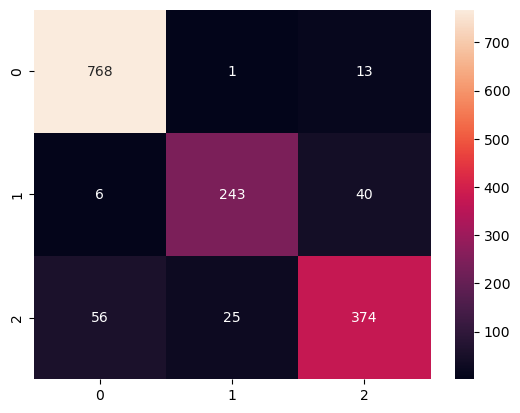

In [362]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf1=confusion_matrix(y_test_w2v,y_pred)
sns.heatmap(cf1,annot=True,fmt='d')

# SVM

In [190]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [356]:
from sklearn.svm import SVC
svc_clf=SVC(C=10,gamma='scale',kernel='rbf')
svc_clf.fit(x_train_w2v,y_train_w2v)

y_pred = svc_clf.predict(x_test_w2v)

print('Training accuracy: {:.2f}'.format(svc_clf.score(x_train_w2v, y_train_w2v)))
print('Testing accuracy: {:.2f}'.format(svc_clf.score(x_test_w2v, y_test_w2v)))
from sklearn import metrics
print(metrics.classification_report(y_test_w2v,y_pred))

Training accuracy: 1.00
Testing accuracy: 0.97
              precision    recall  f1-score   support

          -1       0.97      1.00      0.99       782
           0       0.97      0.93      0.95       289
           1       0.96      0.94      0.95       455

    accuracy                           0.97      1526
   macro avg       0.97      0.95      0.96      1526
weighted avg       0.97      0.97      0.97      1526



In [193]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc_clf,x_train_w2v,y_train_w2v,cv=5))

[0.90750436 0.91099476 0.91972077 0.88111888 0.91258741]


<AxesSubplot:>

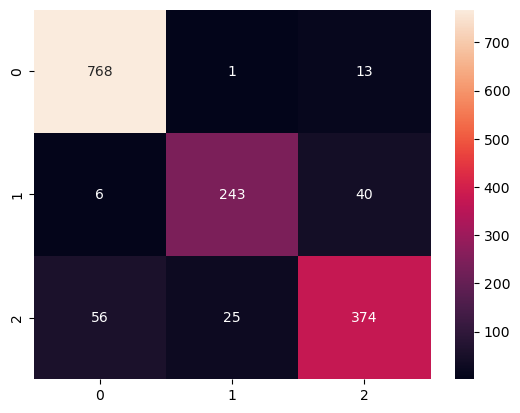

In [363]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf2=confusion_matrix(y_test_w2v,y_pred)
sns.heatmap(cf2,annot=True,fmt='d')

# KNN

In [ ]:
grid_search.best_params_

In [364]:
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(x_train_w2v,y_train_w2v)

y_pred = knn_clf.predict(x_test_w2v)

print('Training accuracy: {:.2f}'.format(knn_clf.score(x_train_w2v, y_train_w2v)))
print('Testing accuracy: {:.2f}'.format(knn_clf.score(x_test_w2v, y_test_w2v)))
print(metrics.classification_report(y_test_w2v,y_pred))

Training accuracy: 1.00
Testing accuracy: 0.97
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       782
           0       0.99      0.88      0.93       289
           1       0.94      0.98      0.96       455

    accuracy                           0.97      1526
   macro avg       0.97      0.95      0.96      1526
weighted avg       0.97      0.97      0.97      1526



In [197]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn_clf,x_train_w2v,y_train_w2v,cv=5))

[0.95113438 0.95636998 0.94589878 0.92482517 0.9458042 ]


<AxesSubplot:>

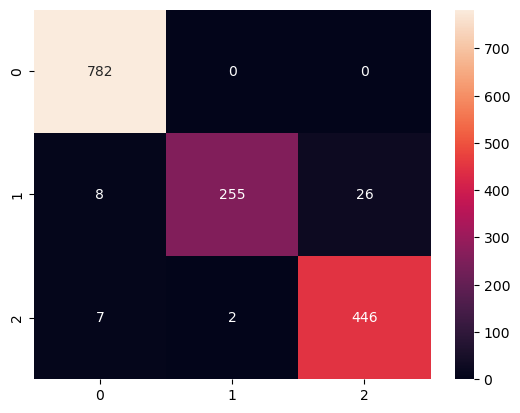

In [365]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf3=confusion_matrix(y_test_w2v,y_pred)
sns.heatmap(cf3,annot=True,fmt='d')

# Random forest

In [ ]:
grid_search.best_params_

In [366]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=100,max_depth=19,criterion='entropy')
rf_clf.fit(x_train_w2v,y_train_w2v)

y_pred=rf_clf.predict(x_test_w2v)
print('Training accuracy:{}'.format(rf_clf.score(x_train_w2v,y_train_w2v)))
print('Testing accuracy:{}'.format(metrics.accuracy_score(y_pred,y_test_w2v)))

print(metrics.classification_report(y_test_w2v,y_pred))

Training accuracy:1.0
Testing accuracy:0.9541284403669725
              precision    recall  f1-score   support

          -1       0.95      1.00      0.98       782
           0       0.94      0.93      0.94       289
           1       0.96      0.89      0.92       455

    accuracy                           0.95      1526
   macro avg       0.95      0.94      0.95      1526
weighted avg       0.95      0.95      0.95      1526



<AxesSubplot:>

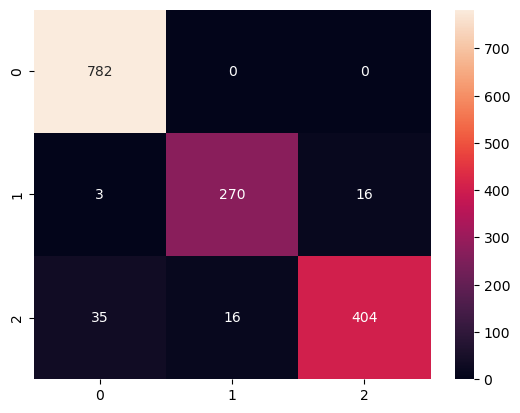

In [367]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf4=confusion_matrix(y_test_w2v,y_pred)
sns.heatmap(cf4,annot=True,fmt='d')

# Xgboost

In [ ]:
grid_search.best_params_

In [368]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=200)
lb=LabelEncoder()
y_train1=lb.fit_transform(y_train_w2v)
y_test1=lb.fit_transform(y_test_w2v)
xgb_clf.fit(x_train_w2v, y_train1)
y_pred=xgb_clf.predict(x_test_w2v)
print('Train accuracy:{}'.format(xgb_clf.score(x_train_w2v,y_train1)))
print('Test accuracy:{}'.format(xgb_clf.score(x_test_w2v,y_test1)))

print(metrics.classification_report(y_test1,y_pred))

Train accuracy:1.0
Test accuracy:0.9626474442988204
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       782
           1       0.95      0.92      0.93       289
           2       0.95      0.93      0.94       455

    accuracy                           0.96      1526
   macro avg       0.96      0.95      0.95      1526
weighted avg       0.96      0.96      0.96      1526



<AxesSubplot:>

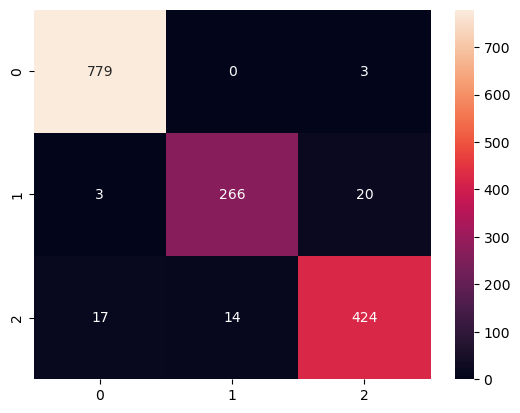

In [370]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf5=confusion_matrix(y_test1,y_pred)
sns.heatmap(cf5,annot=True,fmt='d')

In [371]:
res2={'Models':['logistic regression','SVM','KNN','Random forest','Xgboost'],
    'Training Acc':[log_clf.score(x_train_w2v,y_train_w2v),svc_clf.score(x_train_w2v,y_train_w2v),knn_clf.score(x_train_w2v,y_train_w2v),
                    rf_clf.score(x_train_w2v,y_train_w2v),xgb_clf.score(x_train_w2v,y_train1)],
    'Testing Acc':[log_clf.score(x_test_w2v,y_test_w2v),svc_clf.score(x_test_w2v,y_test_w2v),knn_clf.score(x_test_w2v,y_test_w2v),
                    rf_clf.score(x_test_w2v,y_test_w2v),xgb_clf.score(x_test_w2v,y_test1)]}

In [373]:
res2=pd.DataFrame(res2)
res2

,Models,Training Acc,Testing Acc
0,logistic regression,0.919101,0.907602
1,SVM,0.995506,0.967235
2,KNN,1.000000,0.971822
3,Random forest,1.000000,0.954128
4,Xgboost,1.000000,0.962647


### it can be concluded that:
- Logistic Regression achieved a train accuracy of 0.919101 and a test accuracy of 0.907602. 
- SVM achieved a train accuracy of 0.995506 and a test accuracy of 0.967235. 
- KNN achieved a train accuracy of 1.000000 and a test accuracy of 0.971822. 
- Random Forest achieved a train accuracy of 1.000000 and a test accuracy of 0.954128. 
- Xgboost achieved a train accuracy of 1.000000 and a test accuracy of 0.962647

# Pretrained word2vec model

In [382]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("E:\word2vec\GoogleNews-vectors-negative300.bin", binary=True)

In [383]:
df=pd.read_csv("C:\\Users\\lenovo\\ds project\\Sentimental analysis\\Preprocessed")
df.head()

,Sentence,Sentiment
0,geosolutions technology leverage benefon gps s...,positive
1,esi low bk real possibility,negative
2,last quarter componenta net sale doubled eurm ...,positive
3,according finnishrussian chamber commerce majo...,neutral
4,swedish buyout firm sold remaining percent sta...,neutral


In [384]:
model.most_similar('Profit')

[('Profits', 0.7299023270606995),
 ('Earnings', 0.7154350280761719),
 ('Net_Profit', 0.6674075126647949),
 ('profit', 0.6339422464370728),
 ('Net_Income', 0.6061917543411255),
 ('Quarterly_Profit', 0.5986031293869019),
 ('Net_income', 0.5941538214683533),
 ('Pft', 0.57930988073349),
 ('1Q_Profit', 0.5791439414024353),
 ('4Q_Profit', 0.5751654505729675)]

In [387]:
import nltk
tk=nltk.tokenize.TreebankWordTokenizer()
tokens = [tk.tokenize(sent) for sent in df['Sentence'].astype(str)]

In [388]:
from nltk.corpus import stopwords
for i in range(len(tokens)):
    tokens[i] = [w for w in tokens[i] if w not in stopwords.words('english')]

In [389]:
documents = []
for x in tokens:
    document = [word for word in x if word in model.key_to_index]
    documents.append(document)

In [390]:
#checking if there is any empty list inside documents
counter = 0
for i in range (0,len(documents)):
    if documents[i] == []:
        counter += 1
print(counter)

2


In [391]:
list_v=[]
for i in range (0,len(documents)):
    if documents[i] == []:
        list_v.append(np.zeros(300,))
    else:
        list_v.append(np.mean(model[documents[i]], axis=0))

In [392]:
df_w2v=pd.DataFrame(list_v)

In [393]:
df_w2v['Sentiment']=df['Sentiment']

In [394]:
from imblearn.combine import SMOTEENN
smote=SMOTEENN(random_state=42)
X,y=smote.fit_resample(df_w2v.iloc[:,:-1],df_w2v.Sentiment)

In [395]:
from sklearn.model_selection import train_test_split
x_train_w2v1,x_test_w2v1,y_train_w2v1,y_test_w2v1=train_test_split(X,y,test_size=0.3,random_state=42)

# Logistic regression

In [503]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression(multi_class='multinomial', solver='lbfgs')

log_clf.fit(x_train_w2v1,y_train_w2v1)

y_pred = log_clf.predict(x_test_w2v1)

print('Training accuracy: {:.2f}'.format(log_clf.score(x_train_w2v1, y_train_w2v1)))
print('Testing accuracy: {:.2f}'.format(log_clf.score(x_test_w2v1, y_test_w2v1)))
from sklearn import metrics
print(metrics.classification_report(y_test_w2v1,y_pred))

Training accuracy: 0.94
Testing accuracy: 0.93
              precision    recall  f1-score   support

    negative       0.94      0.99      0.97       792
     neutral       0.90      0.82      0.86       239
    positive       0.91      0.87      0.89       502

    accuracy                           0.93      1533
   macro avg       0.92      0.89      0.90      1533
weighted avg       0.93      0.93      0.92      1533



In [398]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(log_clf,x_train_w2v1,y_train_w2v1,cv=5))

[0.91061453 0.91748252 0.92587413 0.91748252 0.91188811]


<AxesSubplot:>

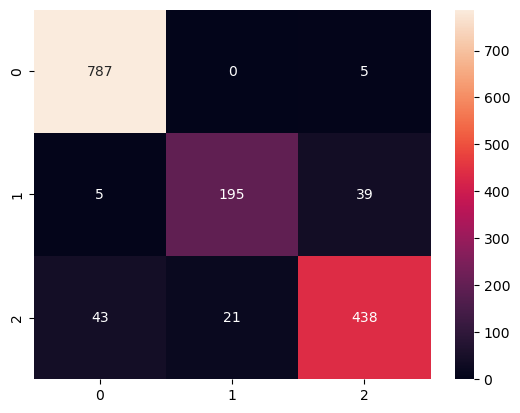

In [399]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf1=confusion_matrix(y_test_w2v1,y_pred)
sns.heatmap(cf1,annot=True,fmt='d')

# SVM

In [ ]:
grid_search.best_params_

In [408]:
from sklearn.svm import SVC
svc_clf=SVC(C=10,gamma='scale',kernel='poly')
svc_clf.fit(x_train_w2v1,y_train_w2v1)

y_pred = svc_clf.predict(x_test_w2v1)

print('Training accuracy: {:.2f}'.format(svc_clf.score(x_train_w2v1, y_train_w2v1)))
print('Testing accuracy: {:.2f}'.format(svc_clf.score(x_test_w2v1, y_test_w2v1)))
from sklearn import metrics
print(metrics.classification_report(y_test_w2v1,y_pred))

Training accuracy: 1.00
Testing accuracy: 0.97
              precision    recall  f1-score   support

    negative       0.98      1.00      0.99       792
     neutral       0.97      0.90      0.93       239
    positive       0.96      0.96      0.96       502

    accuracy                           0.97      1533
   macro avg       0.97      0.95      0.96      1533
weighted avg       0.97      0.97      0.97      1533



In [409]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc_clf,x_train_w2v1,y_train_w2v1,cv=5))

[0.97206704 0.97622378 0.96083916 0.96223776 0.96923077]


<AxesSubplot:>

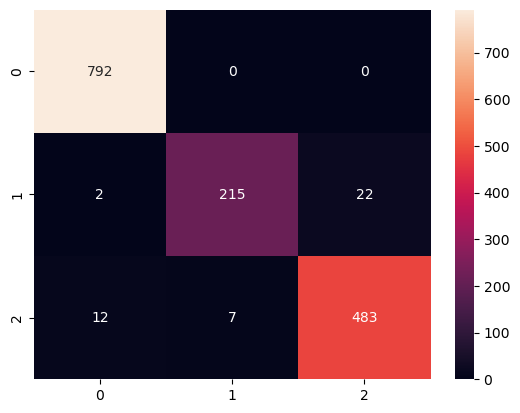

In [410]:
cf2=confusion_matrix(y_test_w2v1,y_pred)
sns.heatmap(cf2,annot=True,fmt='d')

# KNN

In [411]:
from sklearn.neighbors import KNeighborsClassifier

In [413]:
# grid_search.best_params_

In [414]:
knn_clf=KNeighborsClassifier(n_neighbors=1)
knn_clf.fit(x_train_w2v1,y_train_w2v1)

y_pred = knn_clf.predict(x_test_w2v1)

print('Training accuracy: {:.2f}'.format(knn_clf.score(x_train_w2v1, y_train_w2v1)))
print('Testing accuracy: {:.2f}'.format(knn_clf.score(x_test_w2v1, y_test_w2v1)))
print(metrics.classification_report(y_test_w2v1,y_pred))

Training accuracy: 1.00
Testing accuracy: 0.98
              precision    recall  f1-score   support

    negative       0.99      1.00      1.00       792
     neutral       1.00      0.89      0.94       239
    positive       0.95      0.99      0.97       502

    accuracy                           0.98      1533
   macro avg       0.98      0.96      0.97      1533
weighted avg       0.98      0.98      0.98      1533



In [415]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn_clf,x_train_w2v1,y_train_w2v1,cv=5))

[0.96368715 0.96923077 0.96223776 0.96503497 0.95664336]


<AxesSubplot:>

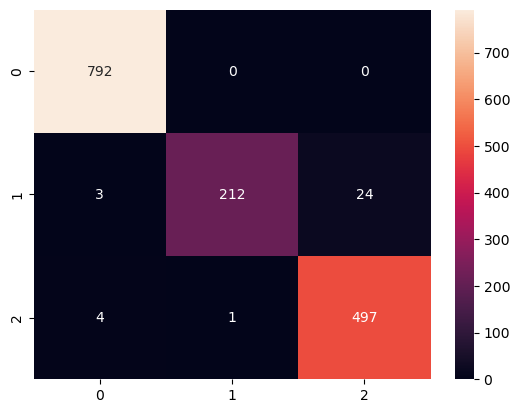

In [416]:
cf3=confusion_matrix(y_test_w2v1,y_pred)
sns.heatmap(cf3,annot=True,fmt='d')

# Random forest

In [ ]:
grid_search.best_params_

In [417]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier(n_estimators=200,max_depth=19,criterion='entropy')
rf_clf.fit(x_train_w2v1,y_train_w2v1)

y_pred=rf_clf.predict(x_test_w2v1)
print('Training accuracy:{}'.format(rf_clf.score(x_train_w2v1,y_train_w2v1)))
print('Testing accuracy:{}'.format(metrics.accuracy_score(y_pred,y_test_w2v1)))

print(metrics.classification_report(y_test_w2v1,y_pred))

Training accuracy:1.0
Testing accuracy:0.928897586431833
              precision    recall  f1-score   support

    negative       0.94      1.00      0.97       792
     neutral       0.97      0.77      0.86       239
    positive       0.89      0.90      0.89       502

    accuracy                           0.93      1533
   macro avg       0.94      0.89      0.91      1533
weighted avg       0.93      0.93      0.93      1533



In [67]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf_clf,x_train_w2v1,y_train_w2v1,cv=5))

[0.93146853 0.90629371 0.91456583 0.92577031 0.90756303]


<AxesSubplot:>

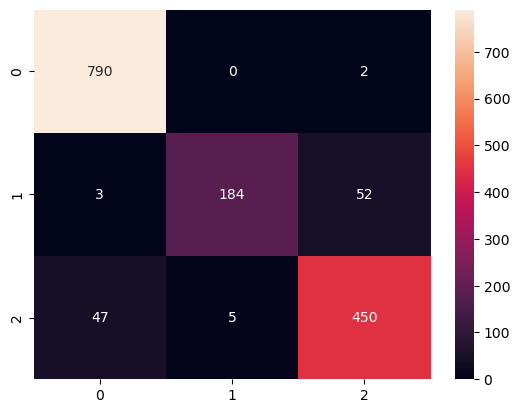

In [418]:
cf4=confusion_matrix(y_test_w2v1,y_pred)
sns.heatmap(cf4,annot=True,fmt='d')

# XGBOOST

In [419]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
xgb_clf = xgb.XGBClassifier(learning_rate=0.5, max_depth=5, n_estimators=200)
lb=LabelEncoder()
y_train1=lb.fit_transform(y_train_w2v1)
y_test1=lb.fit_transform(y_test_w2v1)
xgb_clf.fit(x_train_w2v1, y_train1)
y_pred=xgb_clf.predict(x_test_w2v1)
print('Train accuracy:{}'.format(xgb_clf.score(x_train_w2v1,y_train1)))
print('Test accuracy:{}'.format(xgb_clf.score(x_test_w2v1,y_test1)))

print(metrics.classification_report(y_test1,y_pred))

Train accuracy:1.0
Test accuracy:0.9517286366601435
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       792
           1       0.94      0.86      0.90       239
           2       0.93      0.92      0.93       502

    accuracy                           0.95      1533
   macro avg       0.95      0.93      0.94      1533
weighted avg       0.95      0.95      0.95      1533



In [420]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(xgb_clf,x_train_w2v1,y_train1,cv=5))

[0.93994413 0.94125874 0.93706294 0.94545455 0.94965035]


<AxesSubplot:>

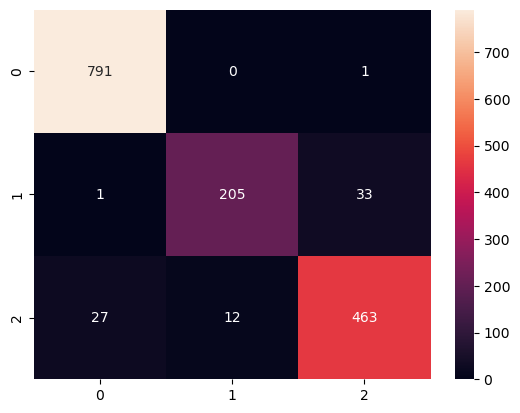

In [423]:
cf5=confusion_matrix(y_test1,y_pred)
sns.heatmap(cf5,annot=True,fmt='d')

# Results of Pretrained Word2vec model

In [424]:
res3={'Models':['logistic regression','SVM','KNN','Random forest','Xgboost'],
    'Training Acc':[log_clf.score(x_train_w2v1,y_train_w2v1),svc_clf.score(x_train_w2v1,y_train_w2v1),knn_clf.score(x_train_w2v1,y_train_w2v1),
                    rf_clf.score(x_train_w2v1,y_train_w2v1),xgb_clf.score(x_train_w2v1,y_train1)],
    'Testing Acc':[log_clf.score(x_test_w2v1,y_test_w2v1),svc_clf.score(x_test_w2v1,y_test_w2v1),knn_clf.score(x_test_w2v1,y_test_w2v1),
                    rf_clf.score(x_test_w2v1,y_test_w2v1),xgb_clf.score(x_test_w2v1,y_test1)]}

In [425]:
results=pd.DataFrame(res3)

In [426]:
results

,Models,Training Acc,Testing Acc
0,logistic regression,0.938199,0.926288
1,SVM,1.000000,0.971950
2,KNN,1.000000,0.979126
3,Random forest,1.000000,0.928898
4,Xgboost,1.000000,0.951729


### it can be concluded that: 
- All models achieved high training accuracy above 94%, indicating that they were able to fit the training data well. 
- SVM and KNN achieved the highest testing accuracy above 97%, indicating that they performed well on the unseen testing data. 
- Random forest achieved the lowest testing accuracy 92.7%, while all other models achieved testing accuracy above 91%, indicating that Random forest may not be the best model for this dataset.